In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [308]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [228]:
data = pd.read_csv('Customer Churn Dataset.csv')

In [229]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [230]:
data.shape

(7043, 21)

In [231]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [233]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [234]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [235]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [236]:
data = data.drop(['customerID'], axis=1)
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [237]:
data[data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [238]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Index([], dtype='int64')

In [239]:
data.fillna(data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [240]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [241]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [242]:
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

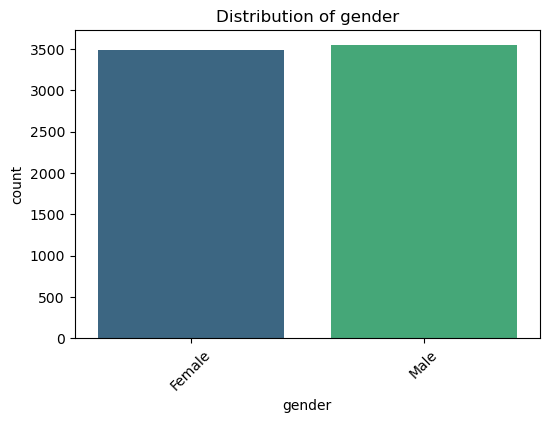

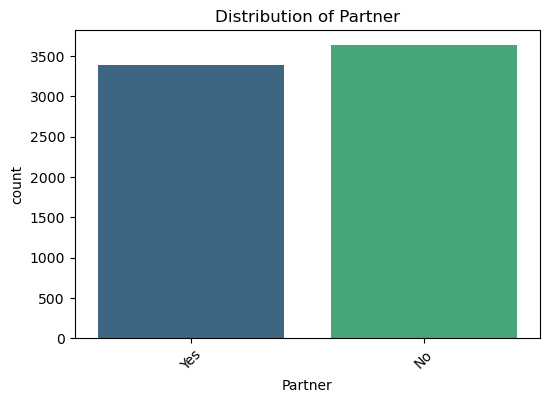

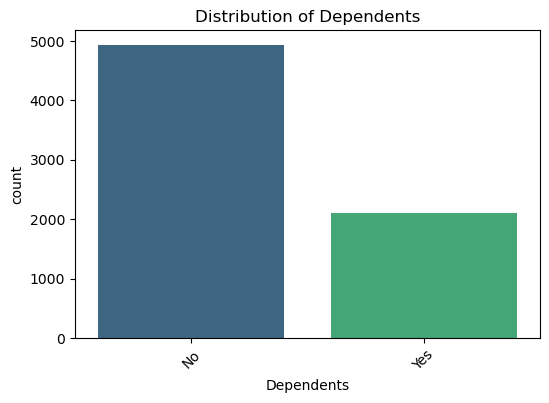

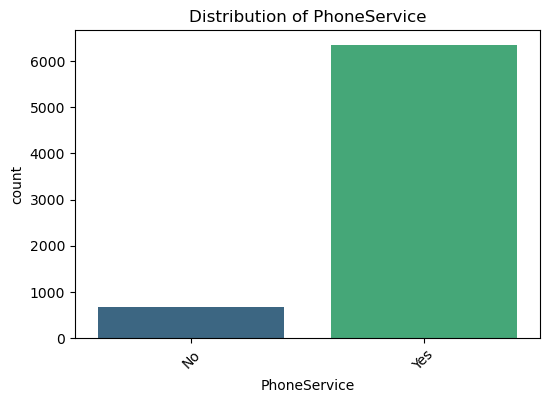

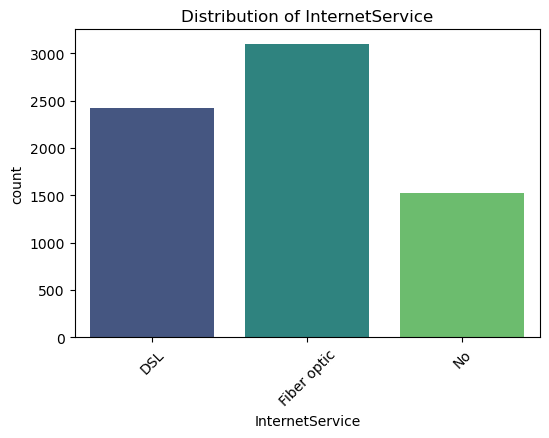

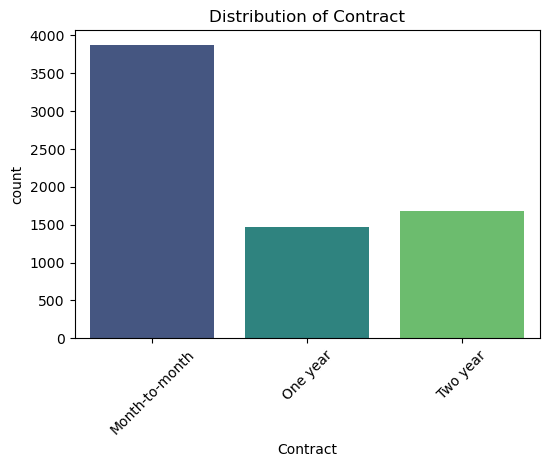

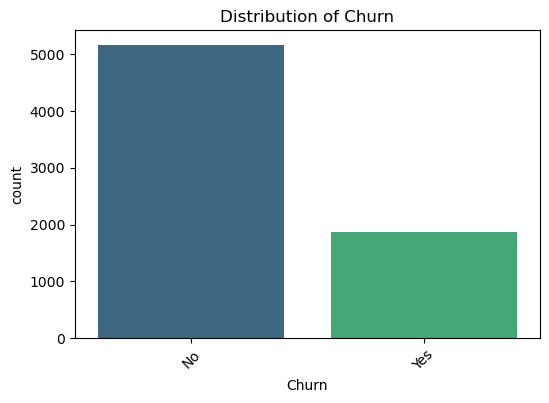

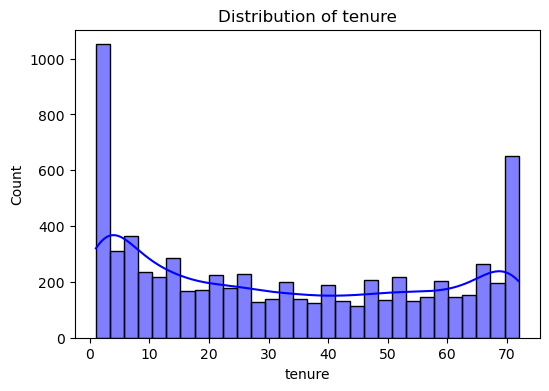

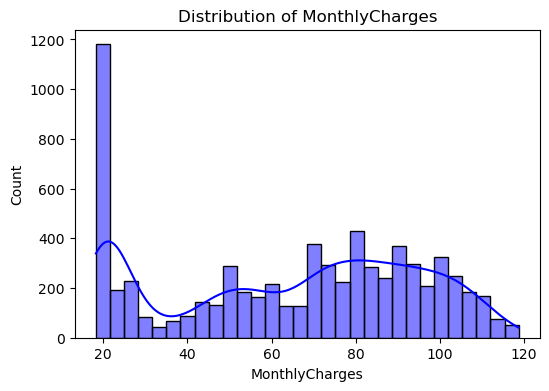

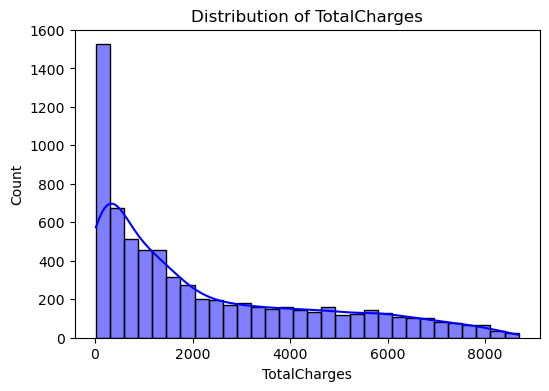

In [243]:

# Plot distribution of categorical variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'Churn']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot histograms for numerical variables
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

In [244]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [245]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [246]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [247]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [248]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [249]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

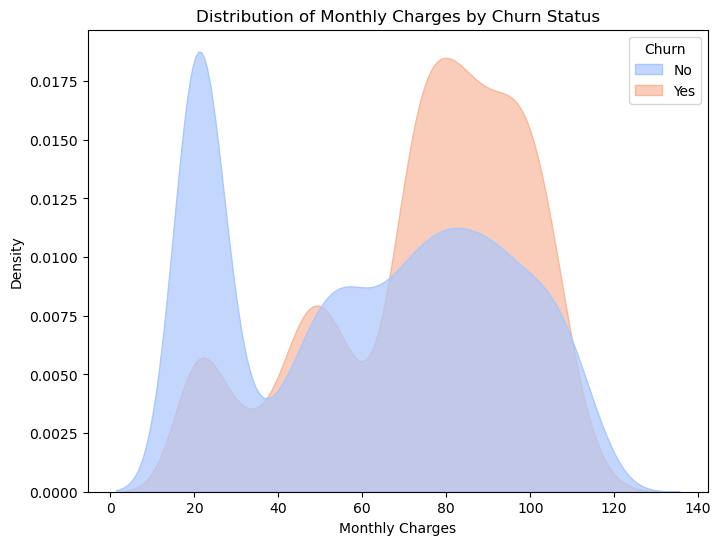

In [250]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, palette="coolwarm", alpha=0.7)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

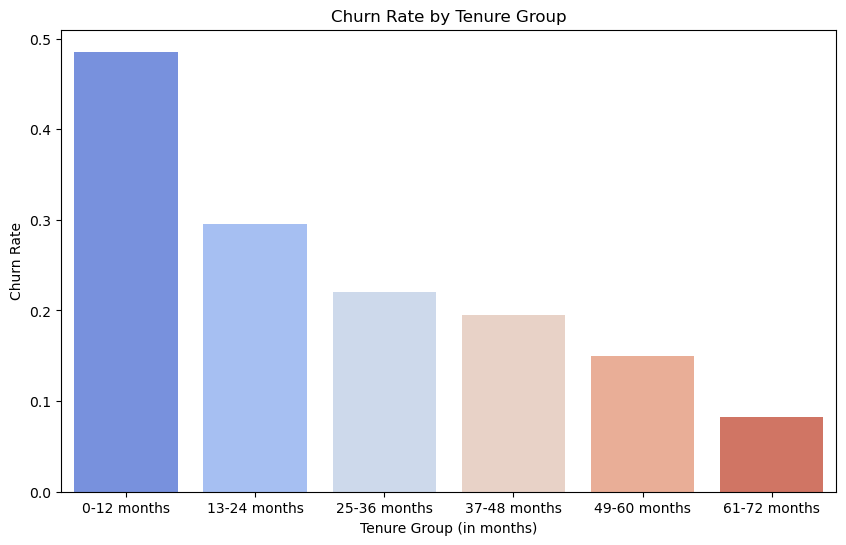

In [251]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months']
data['TenureGroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate for each tenure group
tenure_churn_rate = data.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()
tenure_churn_rate.columns = ['TenureGroup', 'ChurnRate']

# Plot the churn rate by tenure group
plt.figure(figsize=(10, 6))
sns.barplot(data=tenure_churn_rate, x='TenureGroup', y='ChurnRate', palette='coolwarm')
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group (in months)")
plt.ylabel("Churn Rate")
plt.show()

In [252]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [253]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0-12 months
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,25-36 months
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0-12 months
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,37-48 months
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0-12 months


In [254]:
data = data.drop(['TenureGroup'], axis=1)

In [255]:
correlation = data.corr()
print(correlation)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001819 -0.001379    0.010349  0.005285   
SeniorCitizen    -0.001819       1.000000  0.016957   -0.210550  0.015683   
Partner          -0.001379       0.016957  1.000000    0.452269  0.381912   
Dependents        0.010349      -0.210550  0.452269    1.000000  0.163386   
tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
PhoneService     -0.007515       0.008392  0.018397   -0.001078  0.007877   
MultipleLines    -0.006908       0.146287  0.142717   -0.024975  0.343673   
InternetService  -0.002236      -0.032160  0.000513    0.044030 -0.029835   
OnlineSecurity   -0.014899      -0.127937  0.150610    0.151198  0.327283   
OnlineBackup     -0.011920      -0.013355  0.153045    0.090231  0.372434   
DeviceProtection  0.001348      -0.021124  0.165614    0.079723  0.372669   
TechSupport      -0.006695      -0.151007  0.126488    0.132530  0.324729   

In [256]:
data = data.drop(['PhoneService','MonthlyCharges'], axis=1)

In [257]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,1889.50,0
2,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,108.15,1
3,1,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,1840.75,0
4,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,151.65,1
5,0,0,0,0,8,2,1,0,0,2,0,2,2,0,1,2,820.50,1
6,1,0,0,1,22,2,1,0,2,0,0,2,0,0,1,1,1949.40,0
7,0,0,0,0,10,1,0,2,0,0,0,0,0,0,0,3,301.90,0
8,0,0,1,0,28,2,1,0,0,2,2,2,2,0,1,2,3046.05,1
9,1,0,0,1,62,0,0,2,2,0,0,0,0,1,0,0,3487.95,0


In [258]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

In [260]:
num_cols = ["tenure", 'TotalCharges']
data_std = pd.DataFrame(StandardScaler().fit_transform(data[num_cols].astype('float64')),
                       columns=num_cols)

In [261]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [262]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [263]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression()

In [264]:
lr_pred= lr_model.predict(X_test)

In [265]:
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr*100, '%')

Logistic Regression accuracy is : 79.317697228145 %


In [266]:
report_lr = classification_report(y_test,lr_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



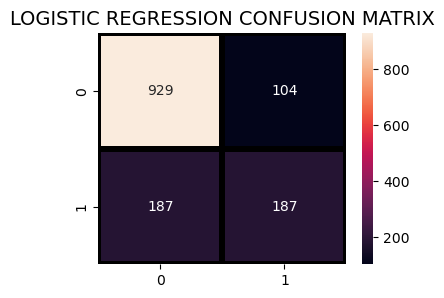

In [267]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [268]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [269]:
svc_pred = svc_model.predict(X_test)

In [270]:
accuracy_svc = svc_model.score(X_test,y_test)
print("Support Vector Classification accuracy is :",accuracy_svc*100, '%')

Support Vector Classification accuracy is : 79.17555081734187 %


In [271]:
report_svc = classification_report(y_test,svc_pred)
print(report_svc)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



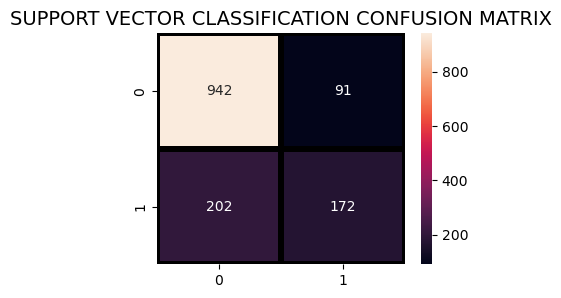

In [272]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFICATION CONFUSION MATRIX",fontsize=14)
plt.show()

In [273]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [274]:
dt_pred = model_dt.predict(X_test)

In [275]:
accuracy_dt = model_dt.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt*100,'%')

Decision Tree accuracy is : 71.92608386638237 %


In [276]:
report_dt = classification_report(y_test,dt_pred)
print(report_dt)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



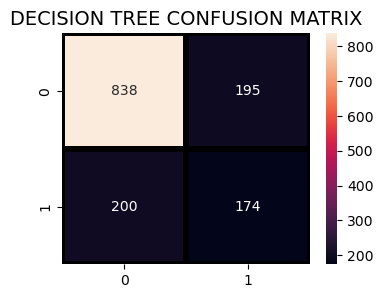

In [277]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

In [278]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [279]:
ada_pred = ada_model.predict(X_test)

In [280]:
print("AdaBoost Classifier accuracy", metrics.accuracy_score(y_test, ada_pred)*100,'%')

AdaBoost Classifier accuracy 78.67803837953092 %


In [281]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



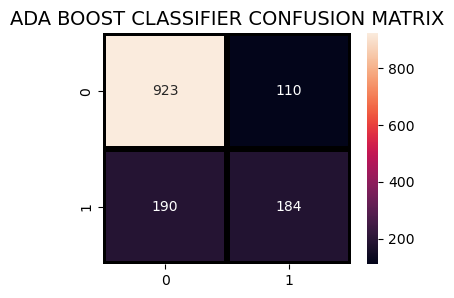

In [282]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ada_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("ADA BOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [283]:
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)
catboost_model.fit(X_train, y_train)

In [284]:
catboost_pred = catboost_model.predict(X_test)

In [285]:
print("CatBoost Classifier accuracy:", metrics.accuracy_score(y_test, catboost_pred)*100,'%')

CatBoost Classifier accuracy: 78.46481876332622 %


In [286]:
print(classification_report(y_test, catboost_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



Key Takeaways:
Class 0 (Negative Class):
Both models (AdaBoost and CatBoost) perform very well on identifying the negative class, with high precision, recall, and F1 scores.

Class 1 (Positive Class):
Both models struggle more with identifying the positive class (Class 1). The recall is low, indicating that many positive instances are being missed (false negatives).

AdaBoost has slightly better precision for Class 1 (0.63 vs. 0.61 for CatBoost), but CatBoost performs slightly better in terms of recall (0.52 vs. 0.49 for AdaBoost).

Overall Performance:
Both models show a similar overall accuracy (around 79% for AdaBoost and 78% for CatBoost).
The macro and weighted averages indicate that both models are doing well overall, but the performance for Class 1 (positive class) can be improved.

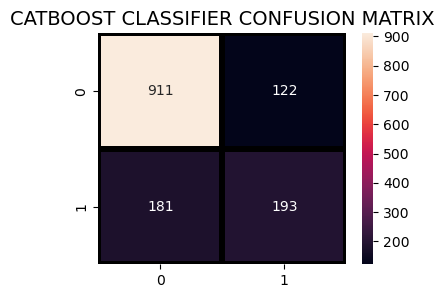

In [287]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, catboost_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("CATBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [288]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier Accuracy", accuracy_score(y_test, gb_pred)*100,'%')

Gradient Boosting Classifier Accuracy 79.03340440653874 %


In [289]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



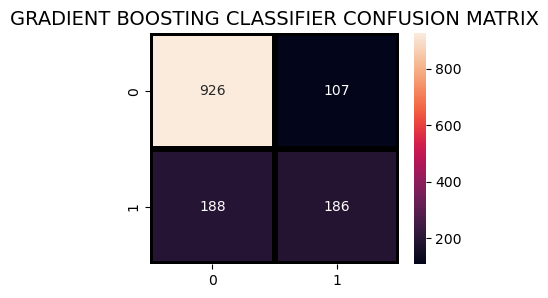

In [290]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("GRADIENT BOOSTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [291]:
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt", 
                                  max_leaf_nodes=30)

In [292]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=50)

In [293]:
rf_pred = model_rf.predict(X_test)
print('Random Forest Classifier Accuracy',metrics.accuracy_score(y_test, rf_pred)*100,'%')

Random Forest Classifier Accuracy 79.317697228145 %


In [294]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



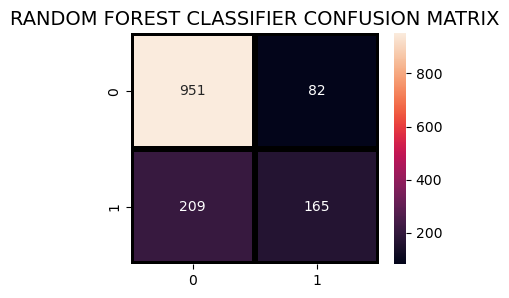

In [295]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

**Best Model:**

The Logistic Regression and Random Forest classifiers both have the highest accuracy (79.32%) among the models. However, when considering the balance between precision and recall, the Random Forest Classifier performs better for Class 1 (churn) with a higher precision (0.67), though it still misses many churn cases (low recall of 0.44).

If your goal is to minimize false positives (i.e., avoid incorrectly classifying non-churn customers as churn), Random Forest is the best choice due to its higher precision for Class 1. However, if you are more concerned with catching as many churn customers as possible (even at the cost of precision), then Logistic Regression may be a better choice, as it has a higher recall for Class 1 (0.50) but with a slightly lower precision (0.64).

Given this trade-off, Random Forest is likely the best model overall, but you may want to tune the models further or even combine them in an ensemble method (like a Voting Classifier) to improve performance.

In [296]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Logistic Regression model for cross-validation
lr_model_cv = LogisticRegression()

# Perform cross-validation
print("Logistic Regression Cross-Validation Results (Train Data):")
lr_cv_scores = cross_val_score(lr_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {lr_cv_scores.mean():.4f}, Standard Deviation: {lr_cv_scores.std():.4f}")

Logistic Regression Cross-Validation Results (Train Data):
Mean Accuracy: 0.8007, Standard Deviation: 0.0171


In [297]:
svc_model_cv = SVC()

# Perform cross-validation
print("SVC Cross-Validation Results (Train Data):")
svc_cv_scores = cross_val_score(svc_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {svc_cv_scores.mean():.4f}, Standard Deviation: {svc_cv_scores.std():.4f}")

SVC Cross-Validation Results (Train Data):
Mean Accuracy: 0.7973, Standard Deviation: 0.0173


In [298]:
# Decision Tree model for cross-validation
dt_model_cv = DecisionTreeClassifier()

# Perform cross-validation
print("Decision Tree Cross-Validation Results (Train Data):")
dt_cv_scores = cross_val_score(dt_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {dt_cv_scores.mean():.4f}, Standard Deviation: {dt_cv_scores.std():.4f}")

Decision Tree Cross-Validation Results (Train Data):
Mean Accuracy: 0.7326, Standard Deviation: 0.0227


In [299]:
ada_model_cv = AdaBoostClassifier()

# Perform cross-validation
print("AdaBoost Cross-Validation Results (Train Data):")
ada_cv_scores = cross_val_score(ada_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {ada_cv_scores.mean():.4f}, Standard Deviation: {ada_cv_scores.std():.4f}")

AdaBoost Cross-Validation Results (Train Data):
Mean Accuracy: 0.8064, Standard Deviation: 0.0132


In [300]:
# CatBoost model for cross-validation
cat_model_cv = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)

# Perform cross-validation
print("CatBoost Cross-Validation Results (Train Data):")
cat_cv_scores = cross_val_score(cat_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {cat_cv_scores.mean():.4f}, Standard Deviation: {cat_cv_scores.std():.4f}")

CatBoost Cross-Validation Results (Train Data):
Mean Accuracy: 0.7897, Standard Deviation: 0.0149


In [301]:
rf_model_cv = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt", 
                                  max_leaf_nodes=30)

# Perform cross-validation
print("Random Forest Cross-Validation Results (Train Data):")
rf_cv_scores = cross_val_score(rf_model_cv, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Mean Accuracy: {rf_cv_scores.mean():.4f}, Standard Deviation: {rf_cv_scores.std():.4f}")

Random Forest Cross-Validation Results (Train Data):
Mean Accuracy: 0.8055, Standard Deviation: 0.0158


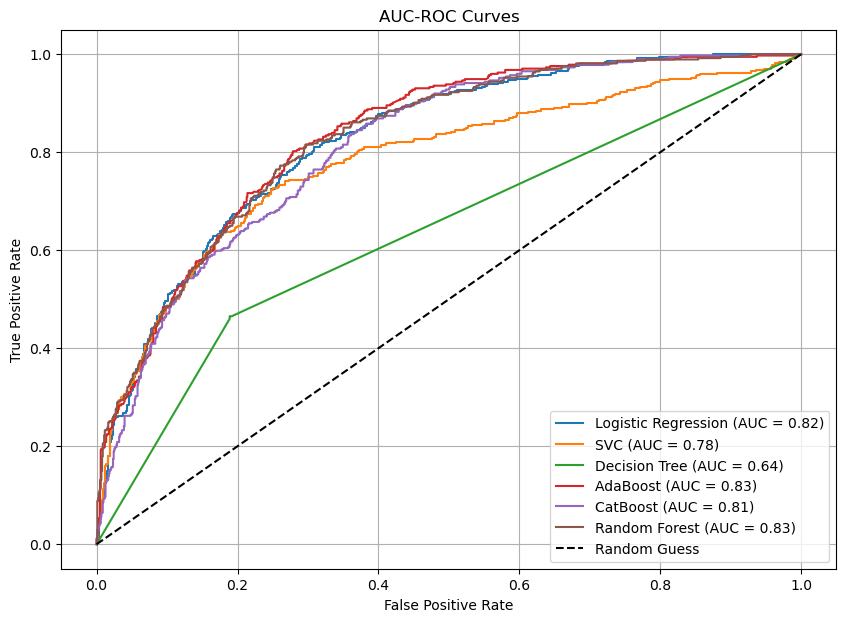

In [304]:

def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot AUC-ROC curves for all models
plt.figure(figsize=(10, 7))

# Logistic Regression
plot_roc_curve(lr_model, X_test, y_test, "Logistic Regression")

# SVC (use decision_function for ROC)
svc_probs = svc_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, svc_probs)
auc_score_svc = roc_auc_score(y_test, svc_probs)
plt.plot(fpr, tpr, label=f'SVC (AUC = {auc_score_svc:.2f})')

# Decision Tree
plot_roc_curve(model_dt, X_test, y_test, "Decision Tree")

# AdaBoost
plot_roc_curve(ada_model, X_test, y_test, "AdaBoost")

# CatBoost
plot_roc_curve(catboost_model, X_test, y_test, "CatBoost")

# Random Forest
plot_roc_curve(model_rf, X_test, y_test, "Random Forest")

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

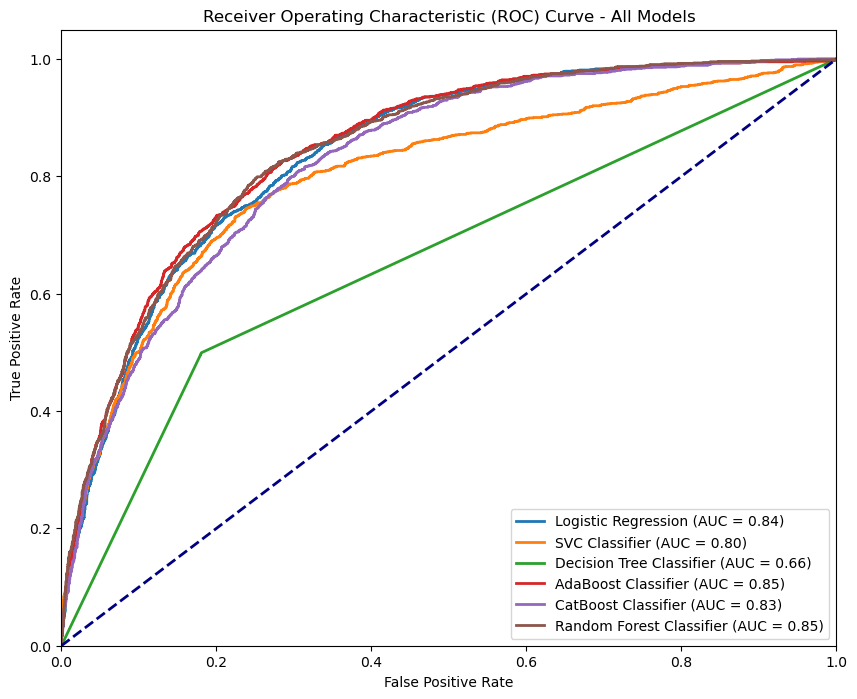

In [309]:
# Function to plot AUC-ROC curve using cross-validation
def plot_auc_roc_combined(models, X, y, model_names):
    plt.figure(figsize=(10, 8))  # Create a new figure for the combined plot
    
    # Loop over each model and plot the ROC curve
    for model, model_name in zip(models, model_names):
        # Get predicted probabilities for each class using cross-validation
        y_pred_prob = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        
        # For binary classification, we need to use the probabilities for the positive class (class=1)
        if y_pred_prob.shape[1] > 1:  # Ensure it's binary classification (2 classes)
            fpr, tpr, _ = roc_curve(y, y_pred_prob[:, 1])
            roc_auc = auc(fpr, tpr)
        else:
            # For some models, `predict_proba` might return only one column. In this case, we have to adjust accordingly.
            fpr, tpr, _ = roc_curve(y, y_pred_prob)
            roc_auc = auc(fpr, tpr)
        
        # Plot each ROC curve in the same figure
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line (no skill line)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - All Models')
    plt.legend(loc="lower right")
    plt.show()

# Define the models
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0),
    RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt", 
                                  max_leaf_nodes=30)
]

# Define the model names
model_names = [
    'Logistic Regression',
    'SVC Classifier',
    'Decision Tree Classifier',
    'AdaBoost Classifier',
    'CatBoost Classifier',
    'Random Forest Classifier'
]

# Plot the combined AUC-ROC curve for all models
plot_auc_roc_combined(models, X_train, y_train, model_names)